# **Summary**

The data collected is from a Smart Green Care System installed in an aquaponics system where plant and marine life is cohabitating. To ensure the best possible conditions inside the environment, several sensors have been installed that are gathering the data such as water and air temperature, light intensity, humidity etc. Data from these sensors is used to control which specific actuators need to be activated to maintain optimal conditions for the plants and fish.

We will apply machine learning algorithms to the sensor data to predict the best way to activate the various actuators to ensure that the conditions in the aquaponics system can be maintained to be at their most optimal levels. With increasing urbanization, compact farming systems such as these aquaponics systems are imperative to cater to the rising demand in food production.


In [1]:
import gdown
!mkdir data
"""Dataset is from https://www.mdpi.com/2076-3417/12/19/9809"""
urls = ["https://drive.google.com/uc?export=download&id=10tuyl8CXxqBOdAUR5tCSW4UPCMtNELly"]
outputs = ["dataset.csv"]
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

mkdir: cannot create directory ‘data’: File exists


Downloading...
From: https://drive.google.com/uc?export=download&id=10tuyl8CXxqBOdAUR5tCSW4UPCMtNELly
To: /home/khu173/data/dataset.csv
100%|███████████████████████| 2.53M/2.53M [00:00<00:00, 7.29MB/s]


# **Data Understanding**

In [2]:
"""Loading the packages"""
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/dataset.csv", header=0, index_col=0)

Briefly checking the general information about the dataset.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28493 entries, 0 to 28492
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature_A     28493 non-null  float64
 1   Temperature_B     28493 non-null  float64
 2   Humidity_A        28493 non-null  float64
 3   Humidity_B        28493 non-null  float64
 4   Photometric       28493 non-null  int64  
 5   CO2               28493 non-null  int64  
 6   Soil_temperature  28493 non-null  float64
 7   Soil_humidity     28493 non-null  float64
 8   Soil_EC           28493 non-null  float64
 9   Soil_PH           28493 non-null  float64
 10  Wind_speed        28493 non-null  float64
 11  Wind_direction    28493 non-null  int64  
 12  Radiometric       28493 non-null  int64  
 13  Rainfall_detect   28493 non-null  int64  
 14  Rainfall          28493 non-null  float64
 15  actuator01        28493 non-null  int64  
 16  actuator02        28493 non-null  int64 

From above, we can see that we have 26 variables:
*   15 predictor variables
*   11 response variables

We have integer and float variables. Let's see how many are integer and how many are float. But first, we need to create a list of predictor and response variables, respectively.



In [5]:
x_label = [i for i in df.columns[:15]]
y_label = [i for i in df.columns[15:]]
print(x_label)
print(y_label)

['Temperature_A', 'Temperature_B', 'Humidity_A', 'Humidity_B', 'Photometric', 'CO2', 'Soil_temperature', 'Soil_humidity', 'Soil_EC', 'Soil_PH', 'Wind_speed', 'Wind_direction', 'Radiometric', 'Rainfall_detect', 'Rainfall']
['actuator01', 'actuator02', 'actuator03', 'actuator04', 'actuator05', 'actuator06', 'actuator07', 'actuator08', 'actuator09', 'actuator10', 'actuator11']


In [6]:
int_var = []
float_var = []
for i in df.columns:
  if df[i].dtype == np.int64:    
    int_var.append(i)
  elif df[i].dtype == np.float64:
    float_var.append(i)
print(f'number of integer variables: {len(int_var)}\tinteger variables: {int_var}')
print(f'number of float variables: {len(float_var)}\tfloat variables: {float_var}')

number of integer variables: 16	integer variables: ['Photometric', 'CO2', 'Wind_direction', 'Radiometric', 'Rainfall_detect', 'actuator01', 'actuator02', 'actuator03', 'actuator04', 'actuator05', 'actuator06', 'actuator07', 'actuator08', 'actuator09', 'actuator10', 'actuator11']
number of float variables: 10	float variables: ['Temperature_A', 'Temperature_B', 'Humidity_A', 'Humidity_B', 'Soil_temperature', 'Soil_humidity', 'Soil_EC', 'Soil_PH', 'Wind_speed', 'Rainfall']


So we have 16 integer variables and 10 float variables. What integer variables don't belong to the response variables?

In [7]:
x_int_var = list(set(int_var) - set(y_label))
print(x_int_var)

['Photometric', 'Wind_direction', 'Radiometric', 'Rainfall_detect', 'CO2']


We have 'Rainfall_detect', 'Photometric', 'Radiometric', 'CO2', 'Wind_direction' are the integer predictor variables. Let's see how they look like.

In [8]:
df[x_int_var].describe()

,Photometric,Wind_direction,Radiometric,Rainfall_detect,CO2
count,28493.000000,28493.000000,28493.000000,28493.0,28493.000000
mean,6411.977889,166.147685,199.343383,0.0,454.088899
std,9743.290448,115.432005,266.952227,0.0,35.413986
min,0.000000,0.000000,0.000000,0.0,376.000000
25%,0.000000,42.000000,0.000000,0.0,428.000000
50%,23.000000,174.000000,0.000000,0.0,449.000000
75%,11310.000000,273.000000,353.000000,0.0,474.000000
max,65530.000000,359.000000,990.000000,0.0,602.000000


Rainfall_detect turns out be only 0. So it doesn't have any meaning here to include it in the modeling phase, we can exclude it.

In [9]:
df = df.drop(df[['Rainfall_detect']], axis=1)
x_label.remove('Rainfall_detect')

We also want to see if there's any missing values in our dataset.

In [10]:
print(df.isnull().values.any())
print(df.isna().values.any())

False
False


Or any variables that have weird values (outliers).

In [11]:
for i in x_label:
  print(df[[i]].value_counts())

Temperature_A
28.0             291
28.3             271
21.8             266
28.2             263
27.9             261
                ... 
12.0               1
11.9               1
11.7               1
46.7               1
50.6               1
Length: 389, dtype: int64
Temperature_B
27.5             304
28.0             287
27.9             282
27.7             274
27.3             272
                ... 
14.0               1
12.6               1
11.8               1
11.3               1
41.4               1
Length: 313, dtype: int64
Humidity_A
79.6          110
86.8          109
77.7          109
86.1          105
83.7          104
             ... 
31.0            1
30.7            1
30.6            1
30.5            1
93.8            1
Length: 640, dtype: int64
Humidity_B
86.5          123
92.3          122
92.6          117
92.5          115
96.2          113
             ... 
46.1            1
46.2            1
46.9            1
49.4            1
43.9            1
Length: 539, d

Lucky that we don't have any missing values, but 'Wind_speed' has values of -9999.0.

Now we want to see whether there's any variable(s) highly correlated to each other so we can further reduce the number of variables in the later phases.

In [12]:
cor_mat = df.corr().abs() # create a correlation matrix
upp_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape), k=1).astype(bool)) # create an upper triangle
to_drop = [col for col in upp_tri.columns if any(upp_tri[col] > 0.95)] # take variables where correlation threshold is 0.95

Here's the visualization of the upper triangle. It's easy to see that 'Temperature_A' and 'Temperature_B' are highly correlated to each other, same for 'actuator01' and 'actuator04'.

<AxesSubplot: >

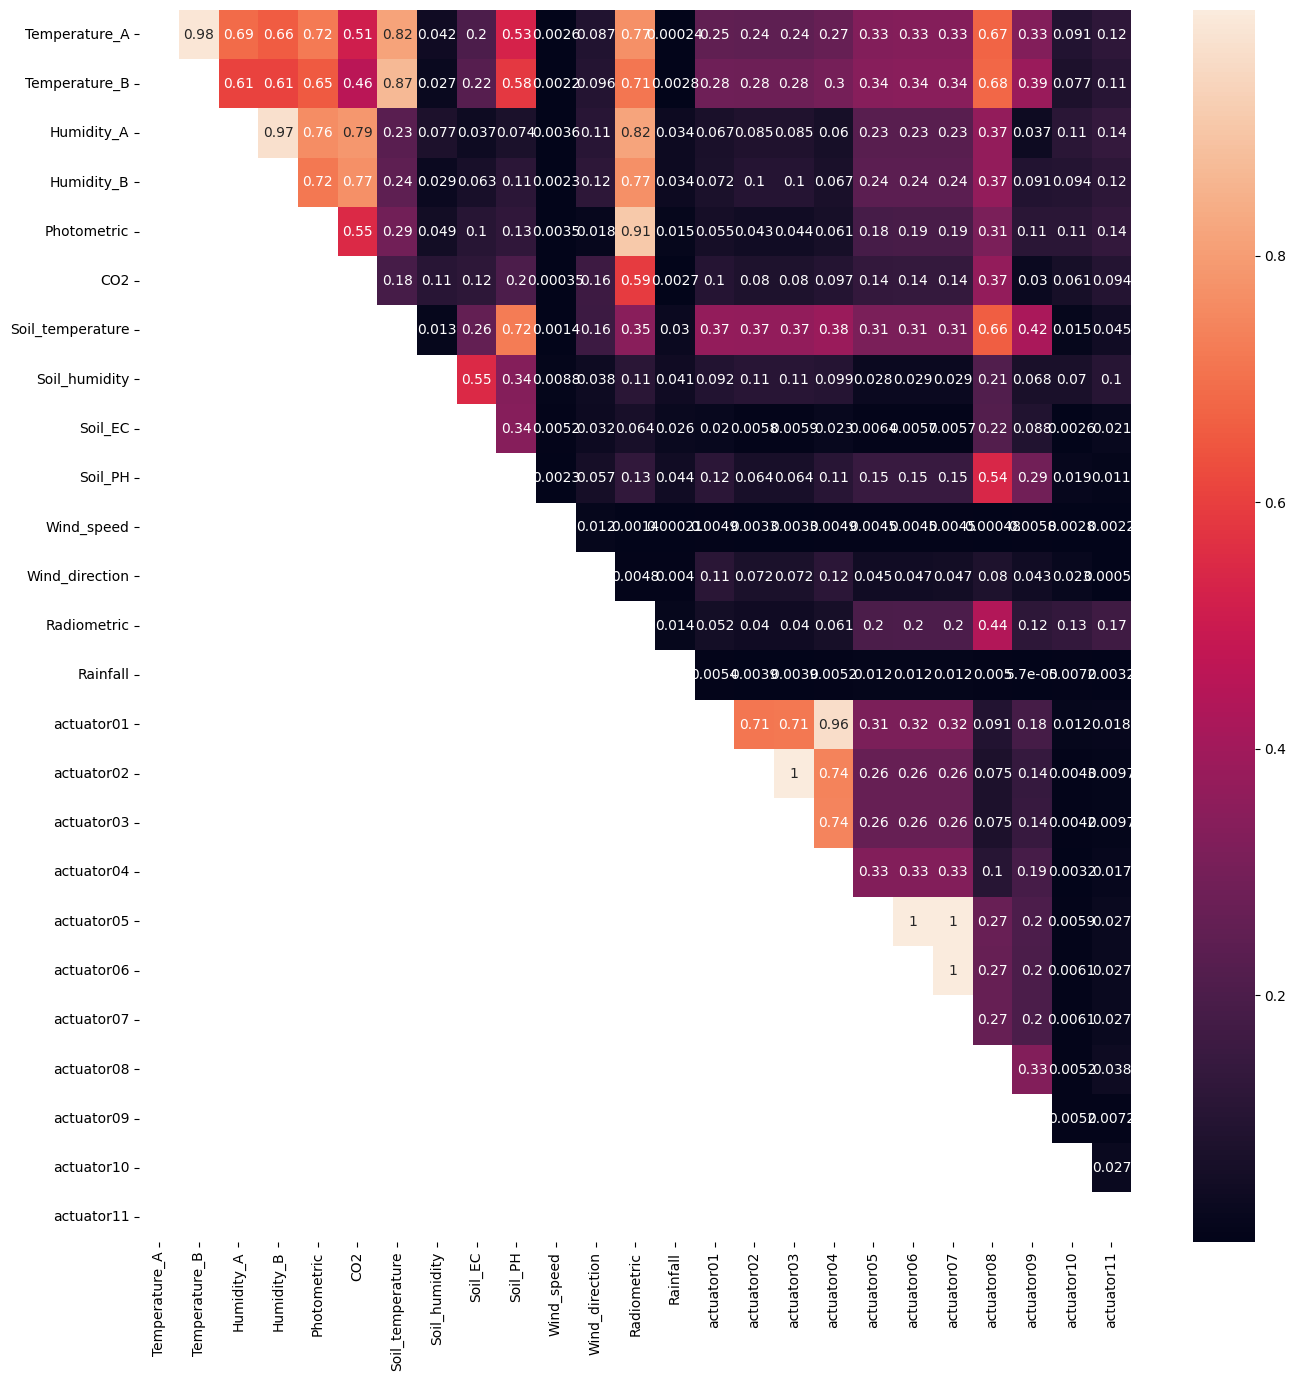

In [13]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(upp_tri, annot=True, ax=ax)

In [14]:
print(to_drop)
x_label = list(set(x_label) - set(to_drop))
y_label = list(set(y_label) - set(to_drop))

['Temperature_B', 'Humidity_B', 'actuator03', 'actuator04', 'actuator06', 'actuator07']


'Temperature_B', 'Humidity_B', 'actuator03', 'actuator04', 'actuator06', 'actuator07' are variables that are highly correlated (more than 0.95). We will drop these from our dataset too.

In [15]:
df = df.drop(df[to_drop], axis=1)

Now we visualize and see the distribution of the variables.

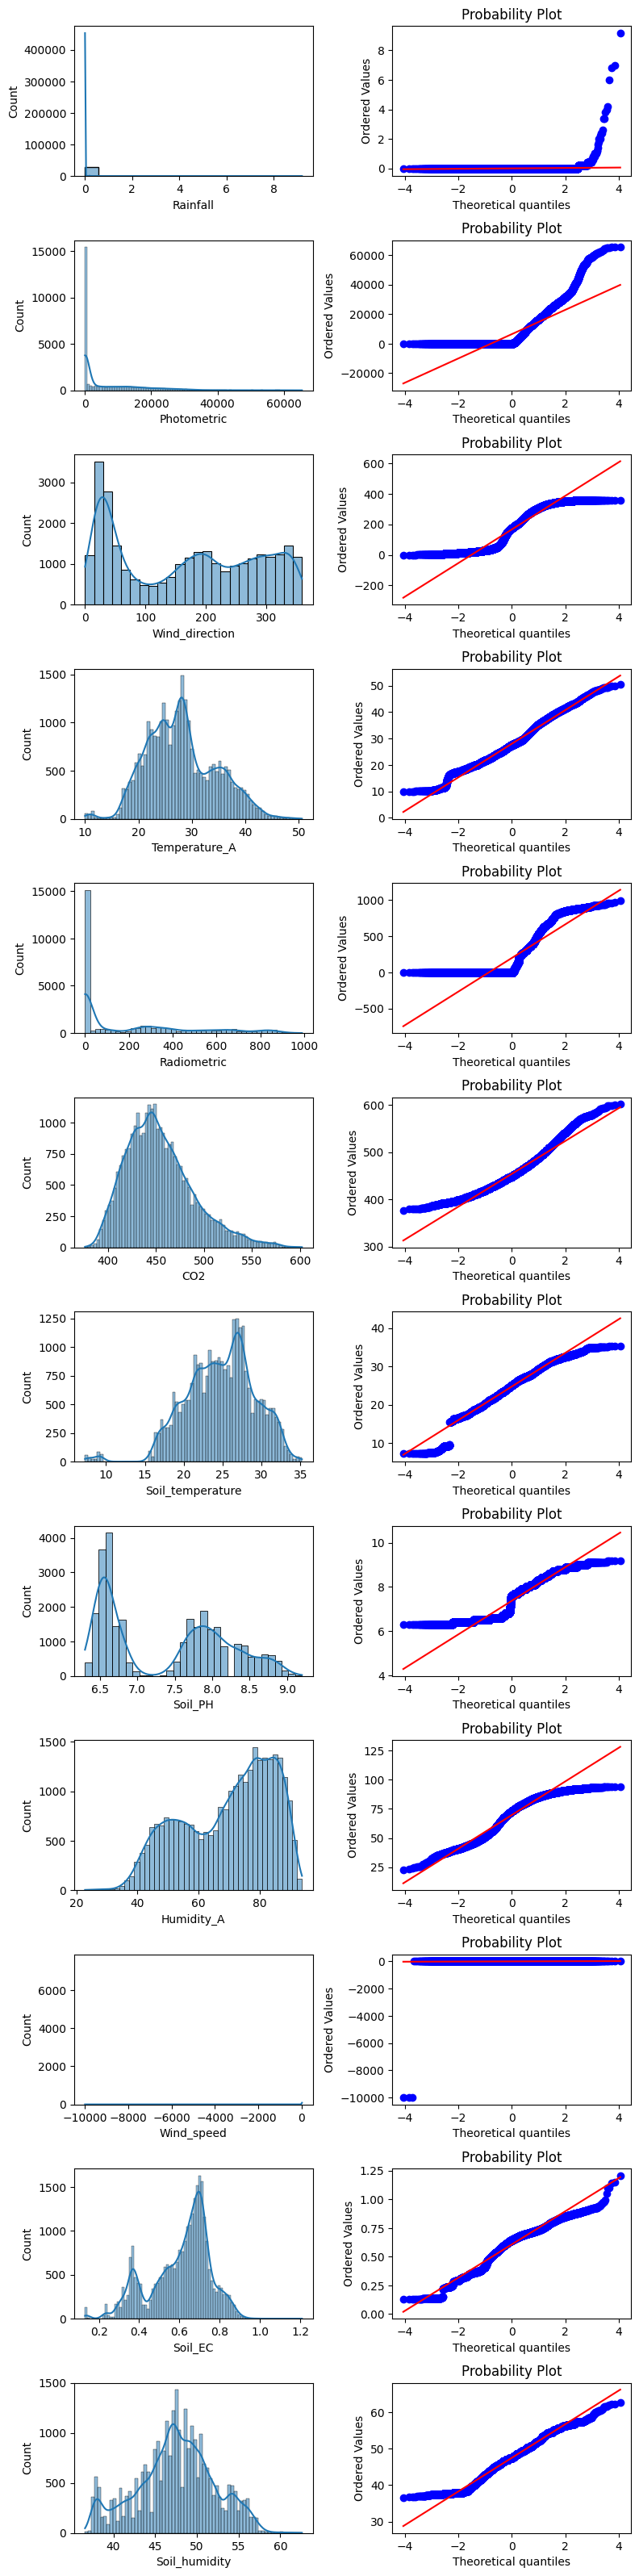

In [16]:
from scipy import stats

fig, axs = plt.subplots(len(x_label), 2, figsize=(8, 32))
for i, v in enumerate(x_label):
  sns.histplot(df[v], ax=axs[i, 0], kde=True)
  stats.probplot(df[v], dist='norm', plot=axs[i, 1])
fig.tight_layout(pad=1.0)

Some look normal, some don't. Especially 'Wind_speed', as mentioned, it has values of -9999.0. Now we take a look at our response variables.

In [59]:
for i, v in enumerate(y_label):
  print(pd.DataFrame(df[v]))

       actuator01
0               1
1               1
2               1
3               1
4               1
...           ...
28488           0
28489           0
28490           0
28491           0
28492           0

[28493 rows x 1 columns]
       actuator05
0               1
1               1
2               1
3               1
4               1
...           ...
28488           0
28489           0
28490           0
28491           0
28492           0

[28493 rows x 1 columns]
       actuator09
0               0
1               0
2               0
3               0
4               0
...           ...
28488           0
28489           0
28490           0
28491           0
28492           0

[28493 rows x 1 columns]
       actuator10
0               0
1               0
2               0
3               0
4               0
...           ...
28488           0
28489           0
28490           0
28491           0
28492           0

[28493 rows x 1 columns]
       actuator08
0             

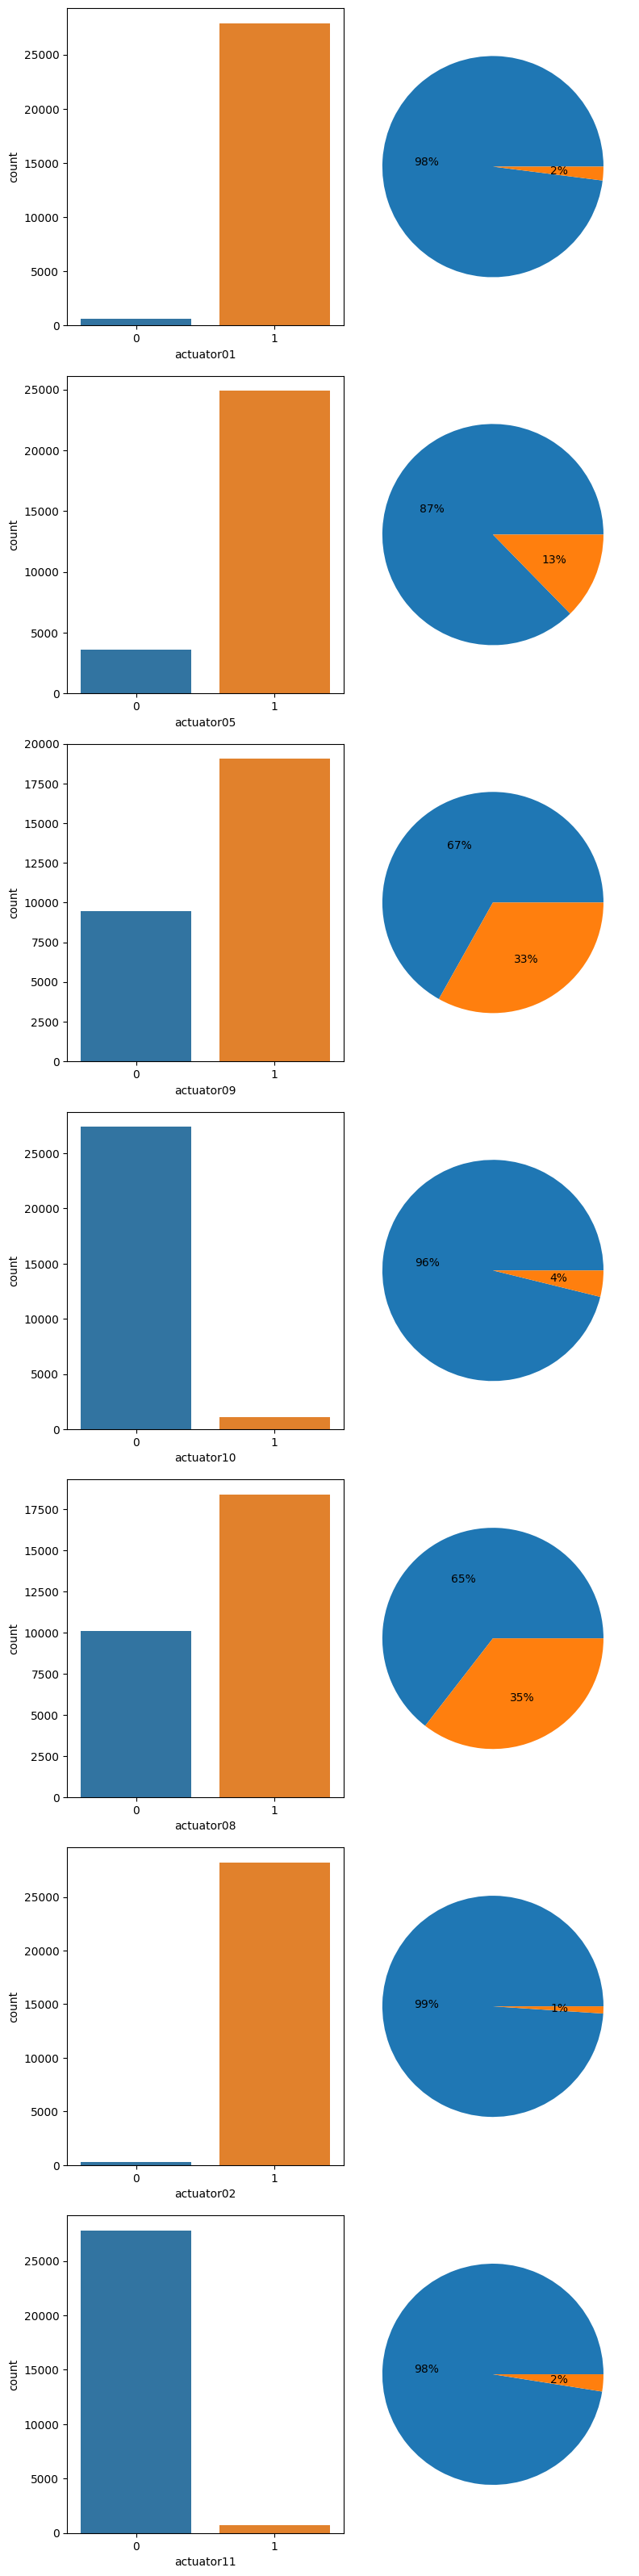

In [67]:
fig, axs = plt.subplots(len(y_label), 2, figsize=(8, 32))

for i, v in enumerate(y_label):
  sns.countplot(x=df[v], ax=axs[i, 0]) # this may not correspond with the pie chart due to some malfunctions
  axs[i, 1].pie(df[v].value_counts(normalize=True), autopct='%1.0f%%') 
fig.tight_layout(pad=1.0)

'actuator01', 'actuator02', 'actuator10', 'actuator11' are extremely disproportional.

# **Data preparation**

'Wind_speed' is the variable that has an outlier of -9999.0. Now we move onto finding outliers. In this, we incorporated a method to find multivariate outliers. Instead of relying on only one variable at a time (univariate), we look to find outliers that associate with multiple variables (multivariate).

In [18]:
w_outliers = df[x_label].copy().to_numpy() # convert df to numpy array to avoid error
covar = np.cov(w_outliers, rowvar=False) # calculate covariance
covar_pm1 = np.linalg.matrix_power(covar, -1) # covariance to the power of -1
centroid = np.mean(w_outliers, axis=0) # find the centroid
dist = [] # take the Mahalanobis distance
for i, v in enumerate(w_outliers):
  p1, p2 = v, centroid
  d = (p1-p2).T.dot(covar_pm1).dot(p1-p2) # formula for Mahalanobis distance
  dist.append(d)
dist = np.array(dist)
from scipy.stats import chi2
cutoff = chi2.ppf(0.95, w_outliers.shape[1]) # get the cutoff using Chi-Square
outlier_index = np.where(dist > cutoff)
wo_outliers = pd.DataFrame(np.delete(w_outliers, list(outlier_index[0]), axis=0), columns=x_label)

Let's see the distribution after removing the outliers.

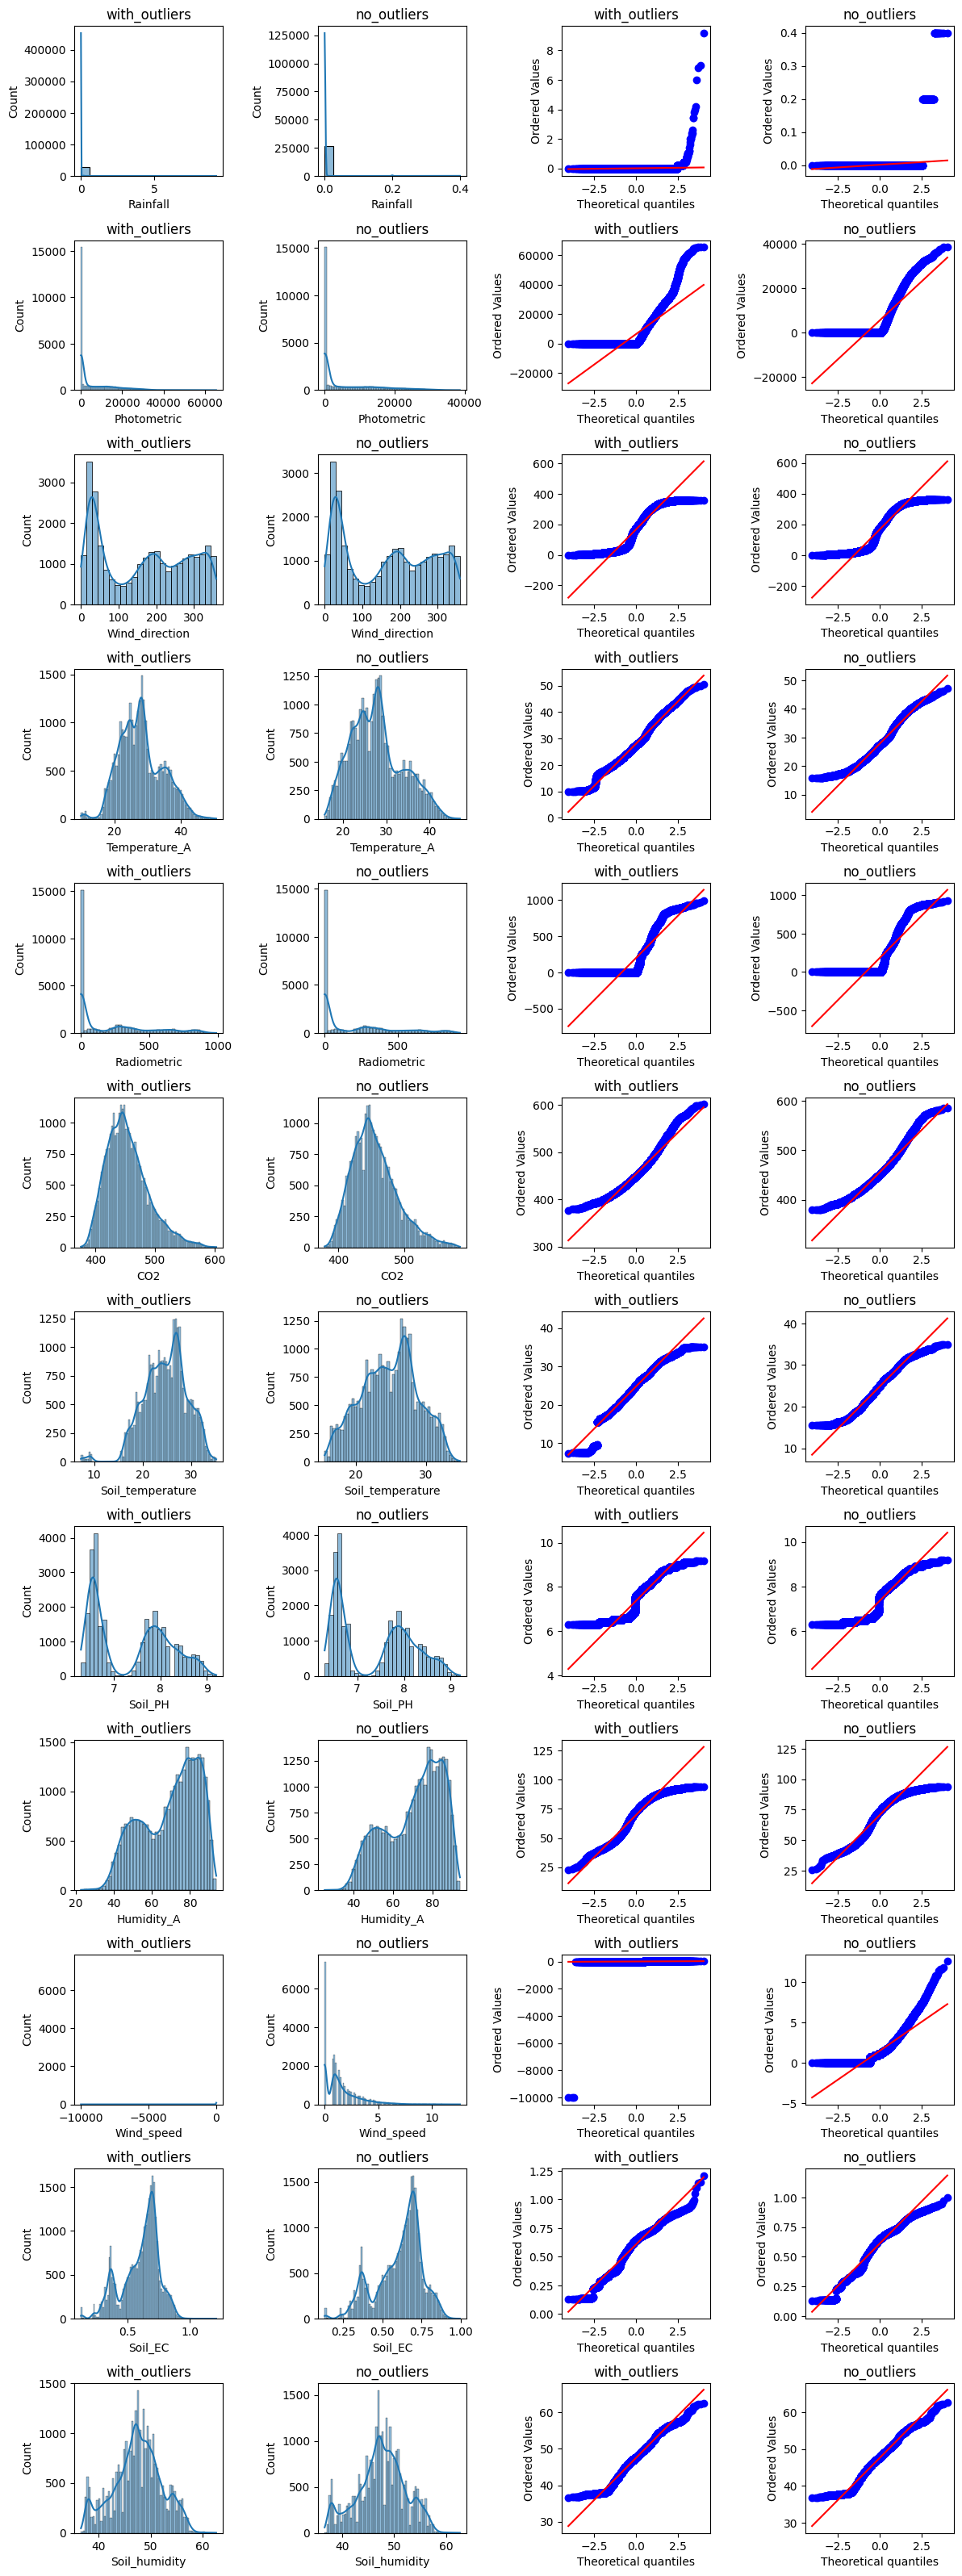

In [19]:
fig, axs = plt.subplots(len(x_label), 4, figsize=(12, 32))
for i, v in enumerate(x_label):
  sns.histplot(df[v], ax=axs[i, 0], kde=True).set(title='with_outliers')
  sns.histplot(wo_outliers[v], ax=axs[i, 1], kde=True).set(title='no_outliers')
  stats.probplot(df[v], dist='norm', plot=axs[i, 2])
  axs[i, 2].set_title('with_outliers')
  stats.probplot(wo_outliers[v], dist='norm', plot=axs[i, 3])
  axs[i, 3].set_title('no_outliers')
fig.tight_layout(pad=1.0)

We can see that it does improve the distribution a bit here with the outliers being removed, especially in the case of 'Wind_speed'.

Now we try the Robust Scaling and Power Transformation on the training set.

In [20]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
r_scaler = RobustScaler()
yj_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
for i in x_label:
  wo_outliers['trans_' + i] = r_scaler.fit_transform(wo_outliers[[i]])
  wo_outliers['trans_' + i] = yj_transformer.fit_transform(wo_outliers[[i]])

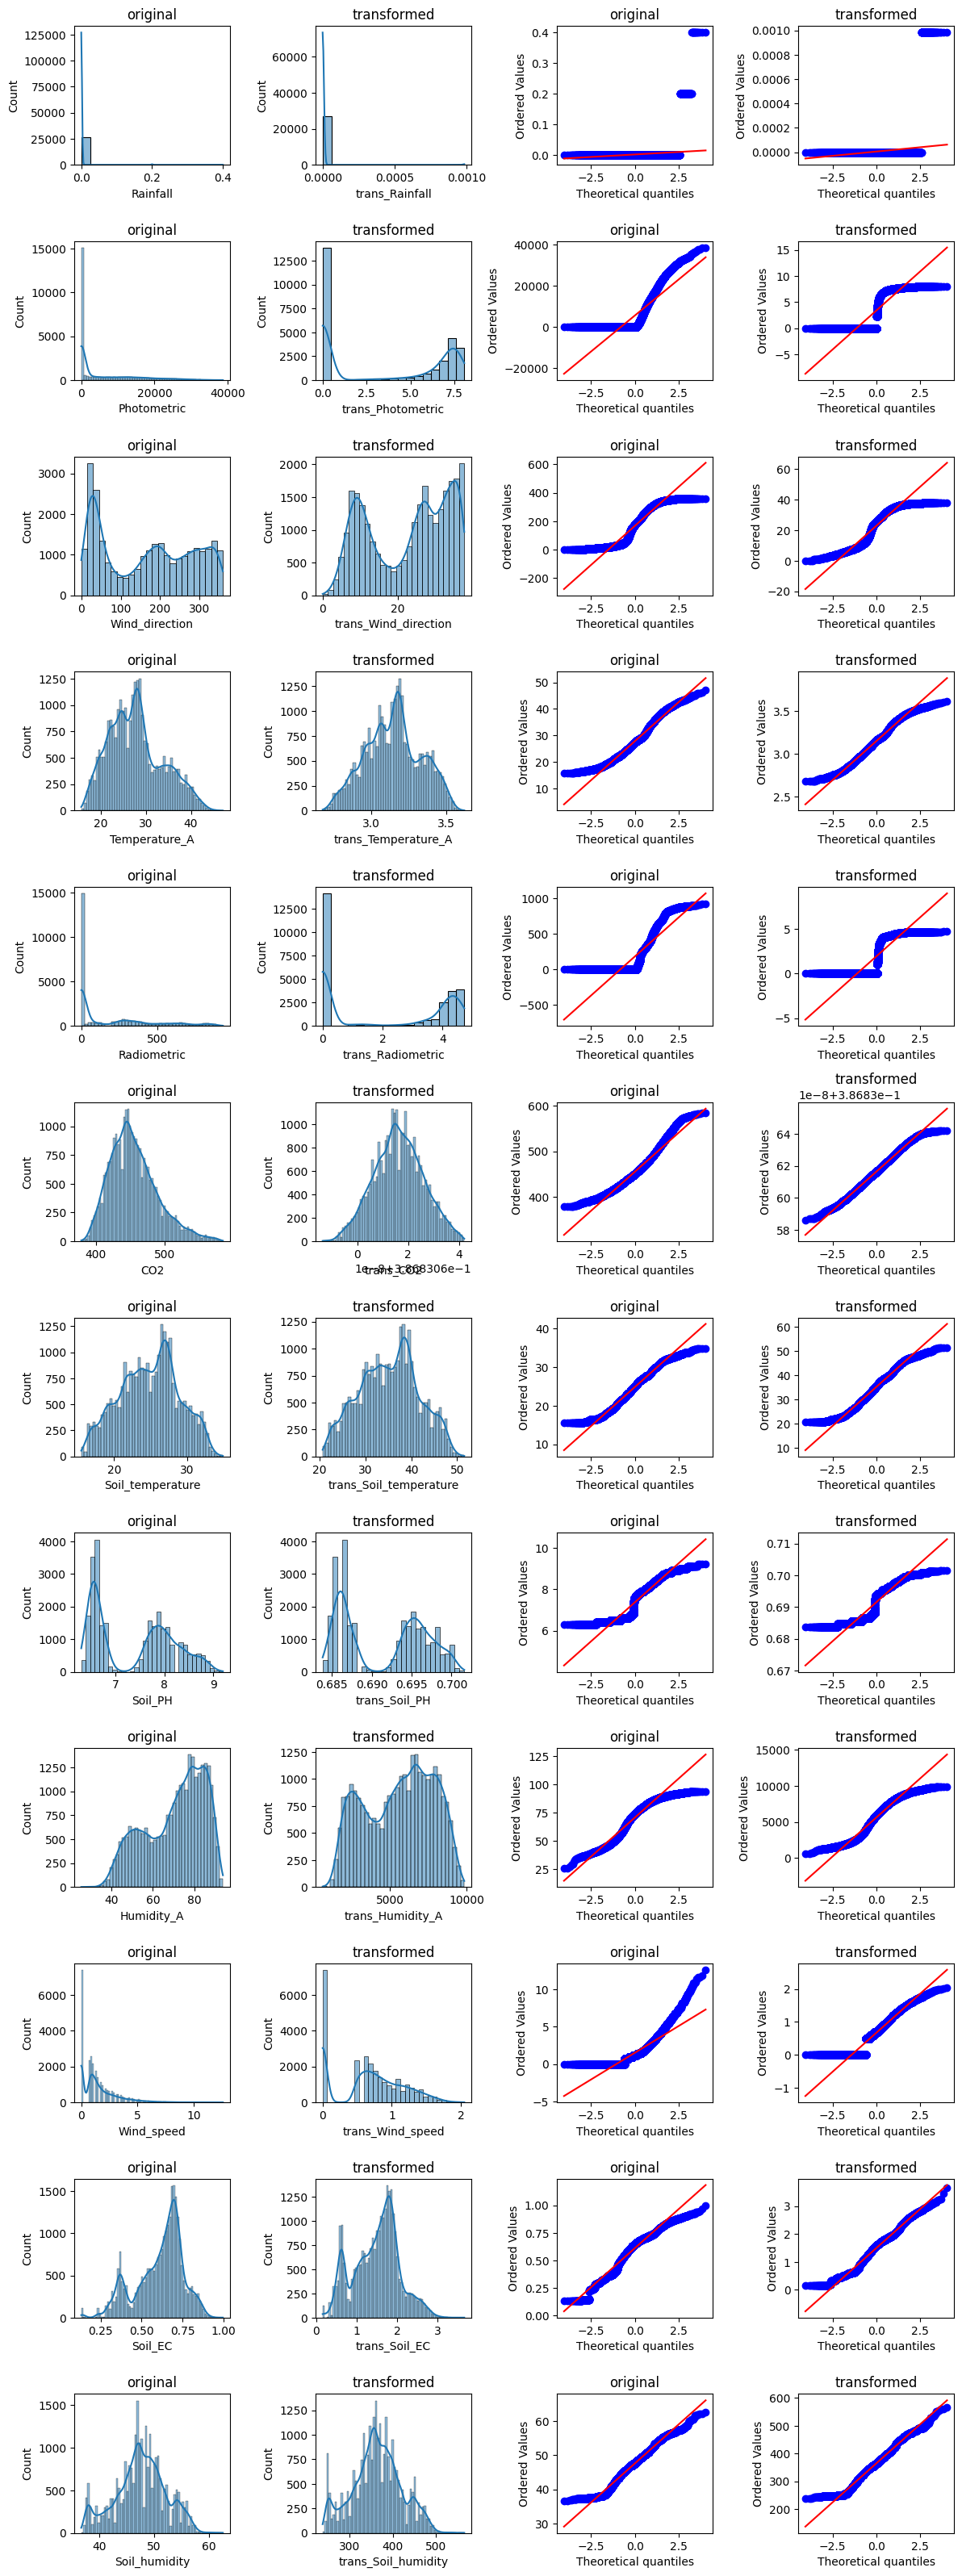

In [21]:
fig, axs = plt.subplots(len(x_label), 4, figsize=(12, 32))
for i, v in enumerate(x_label):
  sns.histplot(wo_outliers[v], ax=axs[i, 0], kde=True).set(title='original')
  sns.histplot(wo_outliers['trans_' + v], ax=axs[i, 1], kde=True).set(title='transformed')
  stats.probplot(wo_outliers[v], dist='norm', plot=axs[i, 2])
  axs[i, 2].set_title('original')
  stats.probplot(wo_outliers['trans_' + v], dist='norm', plot=axs[i, 3])
  axs[i, 3].set_title('transformed')
fig.tight_layout(pad=1.0)

Robust Scaling is done to faciliate the modelling speed. Yeo-Johnson transformation indeed helps improve the distribution a bit in some variables. But for some like 'Photometric', 'Radiometric', 'Rainfall', they still look bad.

# **Modelling and Evaluation** 

Rewrite the multivariate detection into a function.

In [22]:
def multivariate_outlier_detect(x, y, x_label, y_label):
  import numpy as np
  x, y = x.to_numpy(), y.to_numpy()
  covar = np.cov(x, rowvar=False) # calculate covariance
  covar_pm1 = np.linalg.matrix_power(covar, -1) # covariance to the power of -1
  centroid = np.mean(x, axis=0) # find the centroid
  dist = [] # take the Mahalanobis distance
  for i, v in enumerate(x):
    p1, p2 = v, centroid
    d = (p1-p2).T.dot(covar_pm1).dot(p1-p2) # formula for Mahalanobis distance
    dist.append(d)
  dist = np.array(dist)
  from scipy.stats import chi2
  cutoff = chi2.ppf(0.95, x.shape[1]) # get the cutoff using Chi-Square
  outlier_index = np.where(dist > cutoff)
  x = pd.DataFrame(np.delete(x, list(outlier_index[0]), axis=0), columns=x_label)
  y = pd.DataFrame(np.delete(y, list(outlier_index[0]), axis=0), columns=y_label)
  return x, y

We will use three models and four evaluation metrics.

Three models include:

* Logistic Regression
* Random Forest
* Gradient Boosting

Four evaluation metrics include:
* Accuracy
* Precision
* Recall
* ROC/AUC score
* Confusion matrix



In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

models = [
  LogisticRegression(solver='saga', max_iter=1000, n_jobs=-1),
  RandomForestClassifier(n_estimators=1000, max_features=None, random_state=1, bootstrap=True, oob_score=True, n_jobs=-1),
  HistGradientBoostingClassifier(learning_rate=0.01, max_iter=1000, max_leaf_nodes=100)
]

names = ["Logistic Regression", "Random Forest", "Gradient Boosting"]

In [24]:
from sklearn import metrics

def scores(y_true, y_pred):
  return (metrics.accuracy_score(y_true, y_pred), 
          metrics.precision_score(y_true, y_pred), 
          metrics.recall_score(y_true, y_pred),
          metrics.roc_auc_score(y_true, y_pred),
          metrics.confusion_matrix(y_true, y_pred))

In [26]:
cf_dict = {}
for i, v in enumerate(y_label):
  cv = StratifiedKFold(n_splits=5, random_state=i, shuffle=True)
  print(v)
  cf_dict[v] = {}
  for model, name in zip(models, names):
    acc_lst, prec_lst, rec_lst, ra_lst, cf_lst = [], [], [], [], []
    for train_index, test_index in cv.split(df[x_label], df[[v]]):
      X_train, X_test, y_train, y_test = df[x_label].iloc[train_index], df[x_label].iloc[test_index], df[[v]].iloc[train_index], df[[v]].iloc[test_index]
      X_train, y_train = multivariate_outlier_detect(X_train, y_train, x_label, [v])
      r_scaler = RobustScaler()
      yj_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
      for j in x_label:
        X_train[j] = r_scaler.fit_transform(X_train[[j]])
        X_train[j] = yj_transformer.fit_transform(X_train[[j]])
      model.fit(X_train, y_train.values.ravel())
      y_pred = model.predict(X_test)
      acc, prec, rec, ra, cf = scores(y_test, y_pred)
      acc_lst.append(acc)
      prec_lst.append(prec)
      rec_lst.append(rec)
      ra_lst.append(ra)
      cf_lst.append(cf)
    print(f'{name:<20}\taccuracy: {np.mean(acc_lst):.2f}, precision: {np.mean(prec_lst):.2f}, recall: {np.mean(rec_lst):.2f}, roc_auc_score: {np.mean(ra_lst):.2f}')
    cf_dict[v][name] = np.mean(cf_lst, axis=0)

actuator01
Logistic Regression 	accuracy: 0.98, precision: 0.98, recall: 1.00, roc_auc_score: 0.50
Random Forest       	accuracy: 0.98, precision: 0.98, recall: 1.00, roc_auc_score: 0.50
Gradient Boosting   	accuracy: 0.98, precision: 0.98, recall: 1.00, roc_auc_score: 0.50
actuator05
Logistic Regression 	accuracy: 0.87, precision: 0.87, recall: 1.00, roc_auc_score: 0.50
Random Forest       	accuracy: 0.87, precision: 0.87, recall: 1.00, roc_auc_score: 0.50
Gradient Boosting   	accuracy: 0.87, precision: 0.87, recall: 1.00, roc_auc_score: 0.50
actuator09
Logistic Regression 	accuracy: 0.67, precision: 0.67, recall: 1.00, roc_auc_score: 0.50
Random Forest       	accuracy: 0.67, precision: 0.67, recall: 1.00, roc_auc_score: 0.50
Gradient Boosting   	accuracy: 0.67, precision: 0.67, recall: 1.00, roc_auc_score: 0.50
actuator10
Logistic Regression 	accuracy: 0.13, precision: 0.03, recall: 0.81, roc_auc_score: 0.46
Random Forest       	accuracy: 0.48, precision: 0.01, recall: 0.13, roc_auc_

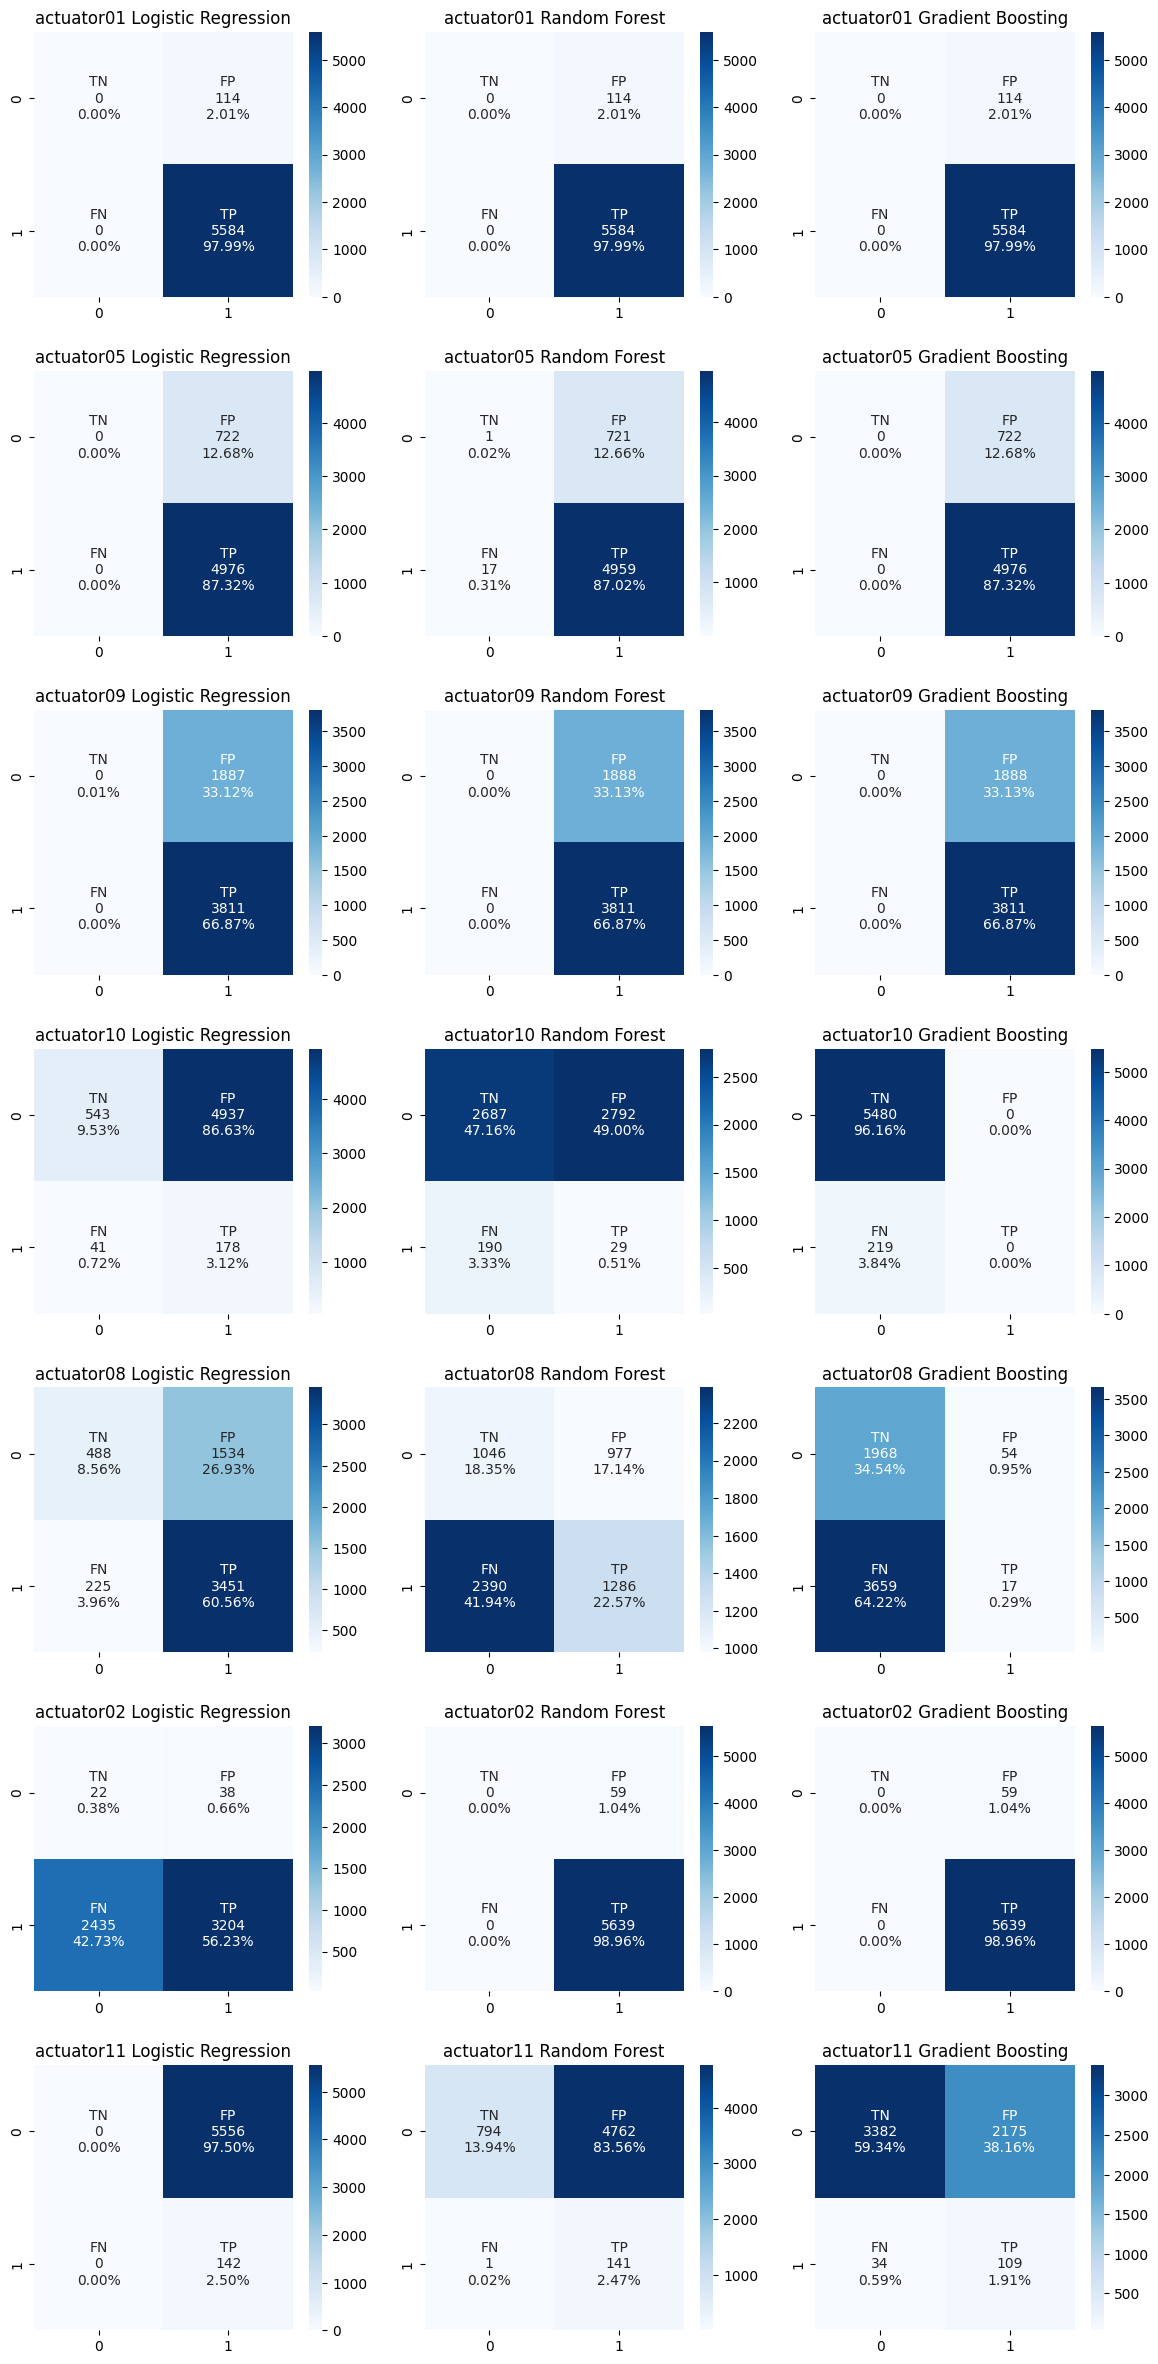

In [27]:
fig, axs = plt.subplots(len(y_label), len(names), figsize=(12, 24))

for m, i in enumerate(cf_dict.keys()):
  for n, j in enumerate(cf_dict[i].keys()):
    cf_matrix = cf_dict[i][j]
    group_names = ['TN', 'FP', 'FN', 'TP']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=axs[m, n]).set(title=i + ' ' + j)
fig.tight_layout(pad=2.0)